In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Sometimes the locale loaded is in ANSI. The following three cells check and convert the locale encoding to UTF-8.

In [ ]:
import locale
print(locale.getpreferredencoding())

UTF-8


In [ ]:
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
import locale
print(locale.getpreferredencoding())

UTF-8


Importing the LangSAM model from https://github.com/luca-medeiros/lang-segment-anything.git

In [ ]:
%pip install torch torchvision
%pip install -U git+https://github.com/luca-medeiros/lang-segment-anything.git

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
%pip install huggingface_hub
%pip install python_dotenv
%pip install diffusers
%pip install accelerate
%pip install safetensors
%pip install transformers

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 20.1 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.16.4
    Uninstalling huggingface-hub-0.16.4:
      Successfully uninstalled huggingface-hub-0.16.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lang-sam 0.1.0 requires huggingface-hub<0.17.0,>=0.16.4, but you have huggingface-hub 0.22.2 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 7.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import io
import requests
import PIL
from PIL import Image

In [ ]:
from lang_sam import LangSAM
model = LangSAM()

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


/usr/local/lib/python3.10/dist-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


Model loaded from /root/.cache/huggingface/hub/models--ShilongLiu--GroundingDINO/snapshots/a94c9b567a2a374598f05c584e96798a170c56fb/groundingdino_swinb_cogcoor.pth 
 => _IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight', 'bert.embeddings.position_ids'])


Downloading: "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth" to /root/.cache/torch/hub/checkpoints/sam_vit_h_4b8939.pth
100%|██████████| 2.39G/2.39G [00:12<00:00, 208MB/s]


In [ ]:
streetview = "/content/drive/MyDrive/OIP.jpeg"

image_pil = Image.open(streetview)
print(image_pil)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=474x316 at 0x79C2E2DEDAB0>


In [ ]:
text_prompt = "car"
masks, boxes, phrases, logits = model.predict(image_pil, text_prompt)

In [ ]:
def display_image_with_masks(image, masks):
    num_masks = len(masks)

    fig, axes = plt.subplots(1, num_masks + 1, figsize=(15, 5))
    axes[0].imshow(image)
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    for i, mask_np in enumerate(masks):
        axes[i+1].imshow(mask_np, cmap='gray')
        axes[i+1].set_title(f"Mask {i+1}")
        axes[i+1].axis('off')

    plt.tight_layout()
    plt.show()


def print_detected_phrases(phrases):
    print("\nDetected Phrases:")
    for i, phrase in enumerate(phrases):
        print(f"Phrase {i+1}: {phrase}")

def print_logits(logits):
    print("\nConfidence:")
    for i, logit in enumerate(logits):
        print(f"Logit {i+1}: {logit}")

def detect_from_text(text, imagepath):
    image_pil = Image.open(imagepath).convert("RGB")
    masks, boxes, phrases, logits = model.predict(image_pil, text)
    masks_np = [mask.squeeze().cpu().numpy() for mask in masks]
    display_image_with_masks(image_pil, masks)

In [ ]:
%pip install huggingface_hub

In [ ]:
import torch
from PIL import ImageOps
from diffusers import StableDiffusionInstructPix2PixPipeline
import math
import random


pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained("timbrooks/instruct-pix2pix", torch_dtype=torch.float16, safety_checker=None)

device = "GPU" if torch.cuda.is_available() else "CPU"

if torch.cuda.is_available():
    pipe = pipe.to("cuda")


def pix2pix(
        input_image: Image.Image,
        instruction: str,
        steps: int,
        seed: int,
        text_cfg_scale: float,
        image_cfg_scale: float,
        height=480,
        width=852
    ):
        input_image = ImageOps.fit(input_image, (width, height), method=Image.Resampling.LANCZOS)

        if instruction == "":
            return [input_image, seed]

        generator = torch.manual_seed(seed)
        edited_image = pipe(
            instruction, image=input_image,
            guidance_scale=text_cfg_scale, image_guidance_scale=image_cfg_scale,
            num_inference_steps=steps, generator=generator,
        ).images[0]
        print(f"EDITED: {edited_image}")
        return edited_image

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


model_index.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/569 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
def image_to_bytes(image):
    img_byte_arr = io.BytesIO()
    mPic2 = Image.fromarray(image)
    mPic2 = mPic2.resize((400,264))
    mPic2.save(img_byte_arr, format='JPEG')
    img_byte_arr = img_byte_arr.getvalue()
    return img_byte_arr

def cv2_to_bytes(image):
    return np.array(cv2.imencode('.jpg',image)[1]).tobytes()


def image2cv2(image):
  return np.array(image)

def cv22image(image):
    coloredImg = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return Image.fromarray(coloredImg)

def convert_to_painting(frame, steps=50):
  imageGogh = pix2pix(input_image=framejpg,instruction="Turn it into a Monet-style painting", seed=12345, steps=50, text_cfg_scale=11, image_cfg_scale=1)
  return imageGogh

def get_masked_image(base,image,prompt):
    base = base[:,:848]
    masks, boxes, phrases, logits = model.predict(cv22image(base), "boat")
    baseGray = cv2.cvtColor(image2cv2(base), cv2.COLOR_BGR2GRAY)
    try:
        if len(masks) == 0:
                print(f"No objects of the '{prompt}' prompt detected in the image.")
                return base
        else:
            # Convert masks to numpy arrays
            masks_np = [mask.squeeze().cpu().numpy() for mask in masks]

            # Combine the masks into one super mask
            super_mask = np.zeros_like(baseGray)
            for i, mask_np in enumerate(masks_np):
                _, mask = cv2.threshold(mask_np.astype(np.uint8), 0, 1, cv2.THRESH_BINARY)
                super_mask = np.bitwise_or(super_mask, mask)

            # Get an inverted mask from the super mask
            _, inverted_mask = cv2.threshold(super_mask, 0, 255, cv2.THRESH_BINARY_INV)

            bg = cv2.bitwise_and(np.array(image), np.array(image), mask = inverted_mask)
            front = cv2.bitwise_and(base, base, mask = super_mask)

            new_im = cv2.bitwise_or(bg, front)
            return new_im

    except (requests.exceptions.RequestException, IOError) as e:
        print(f"Error: {e}")

No objects of the 'car' prompt detected in the image.


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DF42D039480>


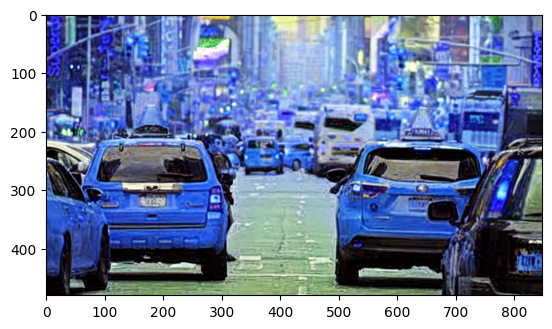

In [ ]:
m1 = get_masked_image(np.array(image_pil), "car")
m2 = convert_to_painting(np.array(m1))
#m3 = cv2.bitwise_and(m1,np.array(m2))
plt.imshow(m2)

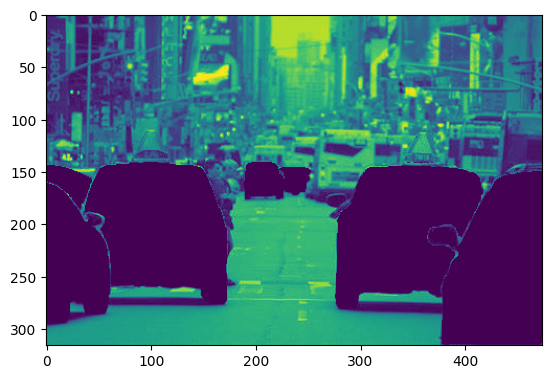

In [ ]:
masks, boxes, phrases, logits = model.predict(image_pil, "car")
image = cv2.cvtColor(image2cv2(image_pil), cv2.COLOR_RGB2GRAY)
masks_np = [mask.squeeze().cpu().numpy() for mask in masks]

# Combine the masks into one super mask
super_mask = np.zeros_like(image)
for i, mask_np in enumerate(masks_np):
    _, mask = cv2.threshold(mask_np.astype(np.uint8), 0, 1, cv2.THRESH_BINARY)
    super_mask = np.bitwise_or(super_mask, mask)

# Get an inverted mask from the super mask
_, inverted_mask = cv2.threshold(super_mask, 0, 255, cv2.THRESH_BINARY_INV)

# Apply the mask on the image
abc = cv2.bitwise_and(image, image, mask = inverted_mask)
plt.imshow(abc)

In [ ]:
inverted_mask.shape

(316, 474)

In [ ]:

maskP = pix2pix(input_image=image_pil,instruction="Turn it into a monet style painting", seed=12345, steps=80, height=316, width=474)

abc = cv2.bitwise_and(image2cv2(maskP), image2cv2(maskP), mask = inverted_mask)
plt.imshow(abc)

  0%|          | 0/80 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=472x312 at 0x7DF42F3B6B90>


error: OpenCV(4.8.0) /io/opencv/modules/core/src/arithm.cpp:230: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'binary_op'


In [ ]:
np.array(maskP).shape

(312, 472, 3)

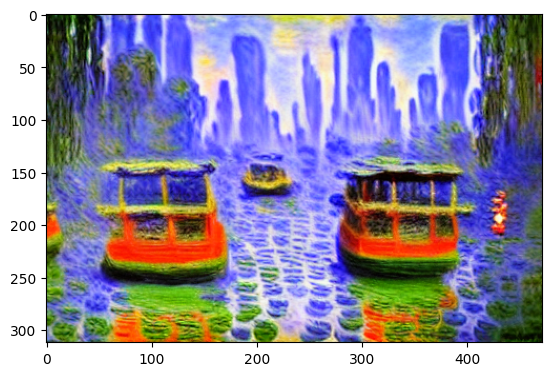

In [ ]:
plt.imshow(maskP)

In [ ]:
maskRe = maskP.resize((474,316))

In [ ]:
maskG = cv2.cvtColor(image2cv2(maskRe), cv2.COLOR_RGB2GRAY)

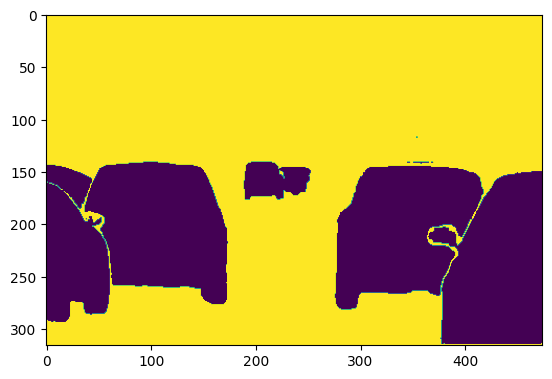

In [ ]:
plt.imshow(inverted_mask)

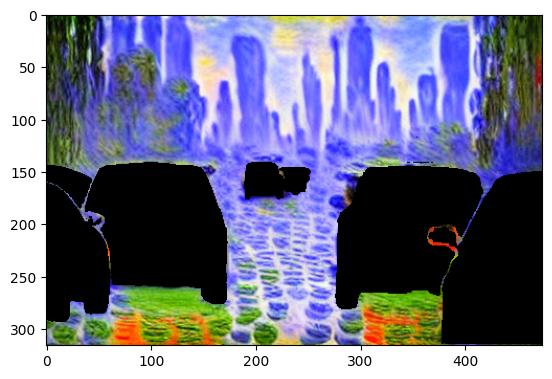

In [ ]:
abc = cv2.bitwise_and(np.array(maskRe), np.array(maskRe), mask = inverted_mask)
plt.imshow(abc)

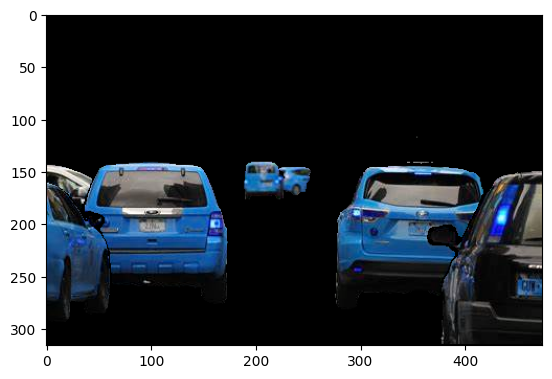

In [ ]:
maskG = cv2.cvtColor(image2cv2(image_pil), cv2.COLOR_RGB2BGR)
abd = cv2.bitwise_and(np.array(maskG), np.array(maskG), mask = super_mask)
plt.imshow(abd)

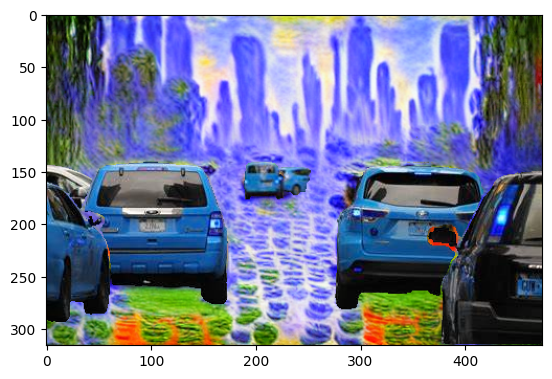

In [ ]:
new_im = cv2.bitwise_or(abc, abd)
plt.imshow(new_im)

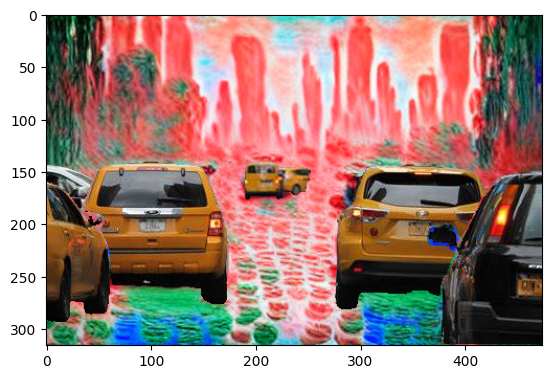

In [ ]:
newImg = cv2.cvtColor(new_im, cv2.COLOR_BGR2RGB)
plt.imshow(newImg)

In [ ]:
# Get the frames
from google.colab.patches import cv2_imshow
vcap = cv2.VideoCapture("/content/drive/MyDrive/CSU Long Beach/boat.mp4")
if not vcap.isOpened():
    print("File Cannot be Opened")

frames=[]
while(True):
    # Capture frame-by-frame
    ret, frame = vcap.read()
    #print cap.isOpened(), ret
    if frame is not None:
        frames.append(frame)
        # Press q to close the video windows before it ends if you want
        if cv2.waitKey(22) & 0xFF == ord('q'):
            break
    else:
        print("Frame is None")
        break

# When everything done, release the capture
vcap.release()
cv2.destroyAllWindows()
print("Video stop")

Frame is None
Video stop


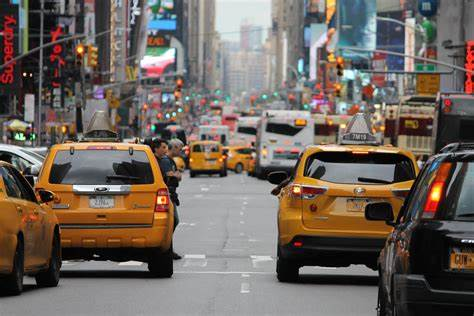

In [ ]:
Image.fromarray(np.asarray(image_pil))

array([[[134, 176, 212],
        [134, 176, 212],
        [134, 176, 212],
        ...,
        [219, 232, 247],
        [219, 232, 247],
        [219, 232, 247]],

       [[134, 176, 212],
        [134, 176, 212],
        [134, 176, 212],
        ...,
        [219, 232, 247],
        [219, 232, 247],
        [219, 232, 247]],

       [[134, 176, 212],
        [134, 176, 212],
        [134, 176, 212],
        ...,
        [219, 232, 247],
        [219, 232, 247],
        [219, 232, 247]],

       ...,

       [[ 39,  66,  67],
        [ 39,  66,  67],
        [ 38,  67,  67],
        ...,
        [120, 137, 143],
        [112, 129, 135],
        [108, 125, 131]],

       [[ 39,  66,  67],
        [ 39,  66,  67],
        [ 38,  67,  67],
        ...,
        [110, 127, 133],
        [120, 137, 143],
        [123, 140, 146]],

       [[ 41,  68,  69],
        [ 41,  68,  69],
        [ 40,  69,  69],
        ...,
        [ 54,  71,  77],
        [ 75,  92,  98],
        [ 96, 113, 119]]], dtype=uint8)
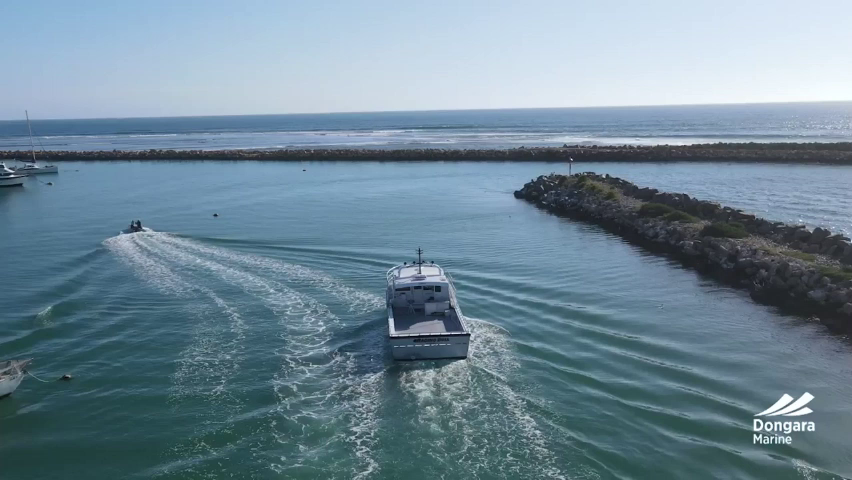

In [ ]:
cv2.cvtColor(frames[0], cv2.COLOR_BGR2RGB)

In [ ]:
maskedFrames = []
counter = 0
for frame in frames:
  cv22image(frame).save('sample.jpeg', 'jpeg')
  framejpg = Image.open('sample.jpeg')
  maskedFrame = convert_to_painting(framejpg, steps=50)
  maskedFrames.append(maskedFrame)
  counter+=1
  print("Image processed: ",counter)

  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAEB6D93C0>
Image processed:  1


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAEB6DA050>
Image processed:  2


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAEB6DABF0>
Image processed:  3


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAEB6DB580>
Image processed:  4


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAEB6DBC70>
Image processed:  5


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAEB6D98D0>
Image processed:  6


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAEB6DAFB0>
Image processed:  7


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAEB731B70>
Image processed:  8


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAEB732620>
Image processed:  9


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAEB733040>
Image processed:  10


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAEB7331C0>
Image processed:  11


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAEB7332B0>
Image processed:  12


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAEB7326E0>
Image processed:  13


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAEB77D300>
Image processed:  14


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAEB77D7B0>
Image processed:  15


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAEB77E830>
Image processed:  16


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAEB732AA0>
Image processed:  17


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAEB6D8A60>
Image processed:  18


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAEB733BB0>
Image processed:  19


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAEB77FB50>
Image processed:  20


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAEB77D4B0>
Image processed:  21


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAEB7E0D60>
Image processed:  22


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAEB7E1D20>
Image processed:  23


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAEB7E25C0>
Image processed:  24


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAEB7E2B30>
Image processed:  25


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAEB7E35B0>
Image processed:  26


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAEB7E34F0>
Image processed:  27


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAEB7E3E80>
Image processed:  28


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAEB7E23E0>
Image processed:  29


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE841DE70>
Image processed:  30


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE841E7D0>
Image processed:  31


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE841E9B0>
Image processed:  32


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE841D2A0>
Image processed:  33


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE841F820>
Image processed:  34


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE841FBE0>
Image processed:  35


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE846D810>
Image processed:  36


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE846D480>
Image processed:  37


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE846EA70>
Image processed:  38


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE846E800>
Image processed:  39


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE846FC10>
Image processed:  40


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE846E350>
Image processed:  41


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE841F760>
Image processed:  42


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAEB77FA30>
Image processed:  43


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE841D9F0>
Image processed:  44


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE84AD210>
Image processed:  45


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAEB7E1ED0>
Image processed:  46


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE84AE440>
Image processed:  47


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE84AEF20>
Image processed:  48


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE84AF430>
Image processed:  49


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE84AEE90>
Image processed:  50


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE830CAF0>
Image processed:  51


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE84AD8A0>
Image processed:  52


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE830DF00>
Image processed:  53


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE830DEA0>
Image processed:  54


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE830EE00>
Image processed:  55


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE830E590>
Image processed:  56


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE830FD00>
Image processed:  57


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE830F340>
Image processed:  58


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE8359360>
Image processed:  59


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE830D6C0>
Image processed:  60


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE835A950>
Image processed:  61


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE835B520>
Image processed:  62


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE835B970>
Image processed:  63


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE835B1C0>
Image processed:  64


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE83A1120>
Image processed:  65


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE835AEF0>
Image processed:  66


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE830C790>
Image processed:  67


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE84AEB00>
Image processed:  68


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE84AD120>
Image processed:  69


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE835A1A0>
Image processed:  70


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE83A29E0>
Image processed:  71


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE83A3550>
Image processed:  72


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE83A3DF0>
Image processed:  73


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE83A2F80>
Image processed:  74


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE8205480>
Image processed:  75


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE83A3EB0>
Image processed:  76


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE82068C0>
Image processed:  77


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE8206F80>
Image processed:  78


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE8207760>
Image processed:  79


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE8207A30>
Image processed:  80


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE824CE50>
Image processed:  81


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE8207250>
Image processed:  82


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE824DD80>
Image processed:  83


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE824E740>
Image processed:  84


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE824F400>
Image processed:  85


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE824FAC0>
Image processed:  86


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE824FFD0>
Image processed:  87


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE824D4E0>
Image processed:  88


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE828DB10>
Image processed:  89


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE824F4F0>
Image processed:  90


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE8204EE0>
Image processed:  91


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE830F460>
Image processed:  92


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE8207AC0>
Image processed:  93


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE828F040>
Image processed:  94


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE824E140>
Image processed:  95


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE828CBE0>
Image processed:  96


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE828ED40>
Image processed:  97


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE82F1210>
Image processed:  98


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE828FD00>
Image processed:  99


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE82F23B0>
Image processed:  100


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE82F2DD0>
Image processed:  101


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE82F3670>
Image processed:  102


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE82F3FD0>
Image processed:  103


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE8140910>
Image processed:  104


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE82F2170>
Image processed:  105


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE8141C30>
Image processed:  106


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE81425C0>
Image processed:  107


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE8143220>
Image processed:  108


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE8141480>
Image processed:  109


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE8143EE0>
Image processed:  110


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE8143A90>
Image processed:  111


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE8185810>
Image processed:  112


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE8143F40>
Image processed:  113


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE8186A10>
Image processed:  114


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE8142BC0>
Image processed:  115


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE82F2050>
Image processed:  116


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE8143DC0>
Image processed:  117


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE8184F10>
Image processed:  118


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE824E890>
Image processed:  119


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE828E890>
Image processed:  120


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE81878E0>
Image processed:  121


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE81DDCF0>
Image processed:  122


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE81DDA50>
Image processed:  123


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE81DF070>
Image processed:  124


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE81DD240>
Image processed:  125


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE81DCA30>
Image processed:  126


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE81DE2C0>
Image processed:  127


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE71D2A0>
Image processed:  128


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE8186380>
Image processed:  129


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE71E710>
Image processed:  130


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE71DE40>
Image processed:  131


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE71FCA0>
Image processed:  132


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE71FD90>
Image processed:  133


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE77CD00>
Image processed:  134


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE71EE00>
Image processed:  135


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE77E440>
Image processed:  136


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE77EDA0>
Image processed:  137


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE77DBA0>
Image processed:  138


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE81DF460>
Image processed:  139


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE8187640>
Image processed:  140


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE81DDC60>
Image processed:  141


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE71F850>
Image processed:  142


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE77C460>
Image processed:  143


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE7DD420>
Image processed:  144


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE7DDDE0>
Image processed:  145


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE7DE800>
Image processed:  146


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE7DF100>
Image processed:  147


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE7DFA00>
Image processed:  148


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE7DF670>
Image processed:  149


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE618C40>
Image processed:  150


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE7DE5C0>
Image processed:  151


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE619CC0>
Image processed:  152


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE61A650>
Image processed:  153


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE6197E0>
Image processed:  154


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE61BD30>
Image processed:  155


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE619330>
Image processed:  156


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE61BCA0>
Image processed:  157


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE661960>
Image processed:  158


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE61BDC0>
Image processed:  159


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE662D70>
Image processed:  160


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE6610F0>
Image processed:  161


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE663A90>
Image processed:  162


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE662410>
Image processed:  163


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE61A080>
Image processed:  164


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE71C3A0>
Image processed:  165


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE7DD0C0>
Image processed:  166


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE7DCCA0>
Image processed:  167


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE6A5660>
Image processed:  168


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE6A6860>
Image processed:  169


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE6A6D10>
Image processed:  170


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE6A6C80>
Image processed:  171


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE6A73D0>
Image processed:  172


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE6A7820>
Image processed:  173


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE50D6C0>
Image processed:  174


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE50DEA0>
Image processed:  175


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE50E6B0>
Image processed:  176


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE50F460>
Image processed:  177


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE50F970>
Image processed:  178


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE50FF40>
Image processed:  179


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE558AC0>
Image processed:  180


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE50F490>
Image processed:  181


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE559FC0>
Image processed:  182


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE55AD70>
Image processed:  183


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE55A2F0>
Image processed:  184


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE55B9D0>
Image processed:  185


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE55B9A0>
Image processed:  186


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE55BF10>
Image processed:  187


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE50E2C0>
Image processed:  188


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE6A41C0>
Image processed:  189


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE662440>
Image processed:  190


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE6A7790>
Image processed:  191


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE59A440>
Image processed:  192


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEAE81DF490>
Image processed:  193


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE59B550>
Image processed:  194


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE59AE90>
Image processed:  195


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE6A69E0>
Image processed:  196


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE59BB50>
Image processed:  197


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE5F1FF0>
Image processed:  198


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE5F2B00>
Image processed:  199


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE5F2F80>
Image processed:  200


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE5F3D60>
Image processed:  201


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE5F3A30>
Image processed:  202


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE5F17E0>
Image processed:  203


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE4498D0>
Image processed:  204


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE44A3B0>
Image processed:  205


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE44A710>
Image processed:  206


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE449030>
Image processed:  207


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE44BAF0>
Image processed:  208


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE44A410>
Image processed:  209


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE4911B0>
Image processed:  210


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE449630>
Image processed:  211


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE449780>
Image processed:  212


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE50F670>
Image processed:  213


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE598220>
Image processed:  214


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE59B9D0>
Image processed:  215


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE492B90>
Image processed:  216


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE44BE50>
Image processed:  217


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE493D00>
Image processed:  218


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE493820>
Image processed:  219


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE4ED180>
Image processed:  220


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE4ECAC0>
Image processed:  221


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE4EE8F0>
Image processed:  222


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE4EF010>
Image processed:  223


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE4EF940>
Image processed:  224


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE4ECC70>
Image processed:  225


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE339000>
Image processed:  226


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE4EE9B0>
Image processed:  227


In [ ]:
type(image_pil)

PIL.JpegImagePlugin.JpegImageFile

<class 'PIL.JpegImagePlugin.JpegImageFile'>


  0%|          | 0/50 [00:00<?, ?it/s]

EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7DEABE339960>


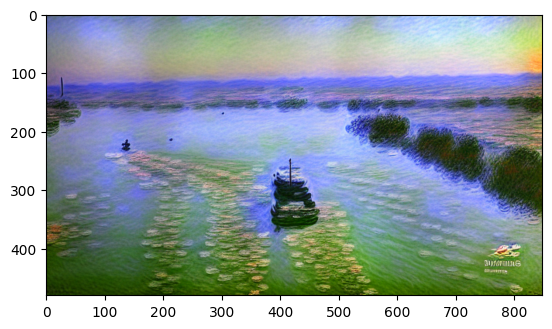

In [ ]:
cv22image(frames[0]).save('sample.jpeg', 'jpeg')
framejpg = Image.open('sample.jpeg')
print(type(framejpg))
maskedFrame =pix2pix(input_image=framejpg,instruction="Turn it into a Monet-style painting", seed=12345, steps=50, text_cfg_scale=11, image_cfg_scale=1)
plt.imshow(maskedFrame)

In [ ]:
type(framejpg)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
for i in range(227):
  maskedFrames[i].save(f'/content/drive/MyDrive/CSU Long Beach/frames/sample{i}.jpeg', 'jpeg')

In [ ]:
maskedFrames=[]
for i in range(227):
  im = cv2.imread(f'/content/drive/MyDrive/CSU Long Beach/frames/sample{i}.jpeg')
  maskedFrames.append(im)

array([[[118, 100,  83],
        [119, 101,  84],
        [124, 104,  87],
        ...,
        [135, 190, 181],
        [135, 192, 183],
        [136, 193, 184]],

       [[120, 100,  83],
        [120, 100,  83],
        [122,  99,  83],
        ...,
        [136, 191, 182],
        [134, 191, 182],
        [134, 191, 182]],

       [[126, 100,  84],
        [126, 100,  84],
        [124,  99,  83],
        ...,
        [137, 192, 183],
        [134, 191, 182],
        [131, 188, 179]],

       ...,

       [[ 10,  52,  34],
        [ 10,  52,  34],
        [ 11,  53,  35],
        ...,
        [ 27, 116,  96],
        [ 27, 116,  96],
        [ 16, 107,  86]],

       [[  6,  52,  30],
        [ 11,  57,  35],
        [ 16,  62,  40],
        ...,
        [  7,  96,  77],
        [ 12, 101,  82],
        [ 10,  99,  80]],

       [[  2,  49,  27],
        [  9,  56,  34],
        [ 17,  64,  42],
        ...,
        [  0,  78,  60],
        [  0,  89,  70],
        [  8,  97,  78]]], dtype=uint8)
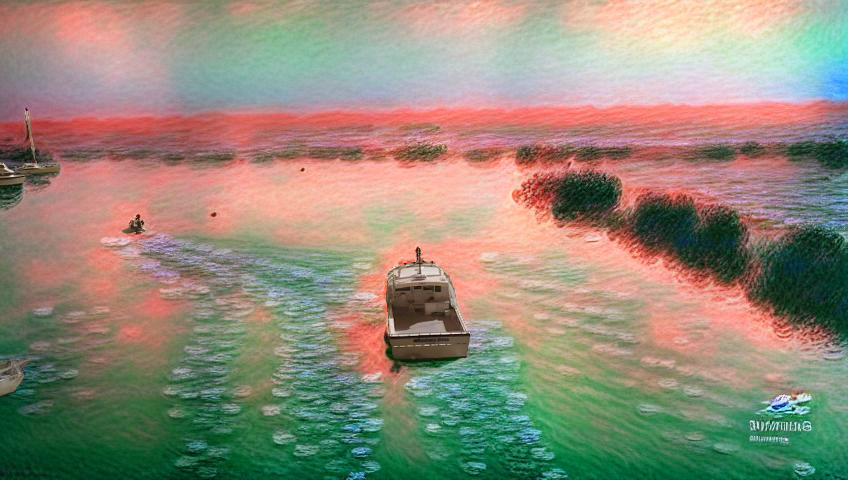

In [ ]:
im = get_masked_image(frames[0], maskedFrames[0],"boat")
im

array([[[ 83, 100, 118],
        [ 84, 101, 119],
        [ 87, 104, 124],
        ...,
        [181, 190, 135],
        [183, 192, 135],
        [184, 193, 136]],

       [[ 83, 100, 120],
        [ 83, 100, 120],
        [ 83,  99, 122],
        ...,
        [182, 191, 136],
        [182, 191, 134],
        [182, 191, 134]],

       [[ 84, 100, 126],
        [ 84, 100, 126],
        [ 83,  99, 124],
        ...,
        [183, 192, 137],
        [182, 191, 134],
        [179, 188, 131]],

       ...,

       [[ 34,  52,  10],
        [ 34,  52,  10],
        [ 35,  53,  11],
        ...,
        [ 96, 116,  27],
        [ 96, 116,  27],
        [ 86, 107,  16]],

       [[ 30,  52,   6],
        [ 35,  57,  11],
        [ 40,  62,  16],
        ...,
        [ 77,  96,   7],
        [ 82, 101,  12],
        [ 80,  99,  10]],

       [[ 27,  49,   2],
        [ 34,  56,   9],
        [ 42,  64,  17],
        ...,
        [ 60,  78,   0],
        [ 70,  89,   0],
        [ 78,  97,   8]]], dtype=uint8)
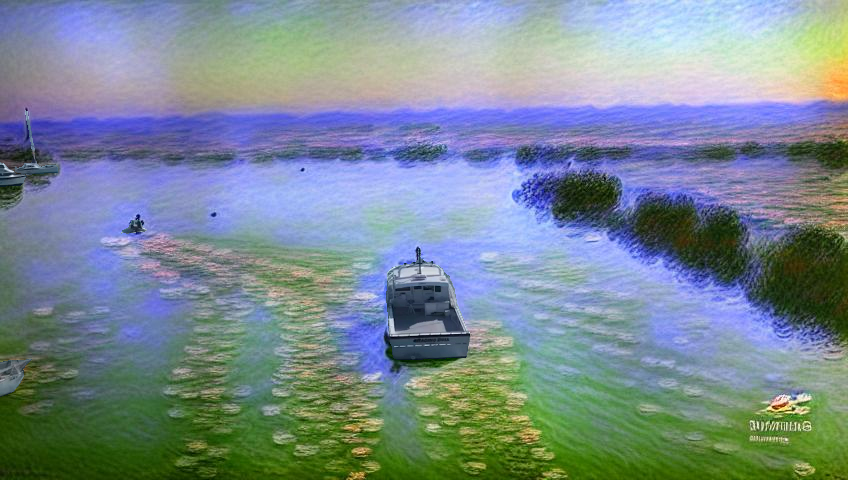

In [ ]:
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im

In [ ]:
for i in range(227):
  im = get_masked_image(frames[i], maskedFrames[i],"boat")
  im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

In [ ]:
finalFrames=[]
for i in range(227):
    im = get_masked_image(frames[i], maskedFrames[i],"boat")
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    finalFrames.append(im)


/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:907: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:90: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


No objects of the 'boat' prompt detected in the image.


In [ ]:
for i in range(227):
    im = cv2.cvtColor(finalFrames[i], cv2.COLOR_RGB2BGR)
    finalFrames[i] = im

array([[[118, 100,  83],
        [119, 101,  84],
        [124, 104,  87],
        ...,
        [135, 190, 181],
        [135, 192, 183],
        [136, 193, 184]],

       [[120, 100,  83],
        [120, 100,  83],
        [122,  99,  83],
        ...,
        [136, 191, 182],
        [134, 191, 182],
        [134, 191, 182]],

       [[126, 100,  84],
        [126, 100,  84],
        [124,  99,  83],
        ...,
        [137, 192, 183],
        [134, 191, 182],
        [131, 188, 179]],

       ...,

       [[ 10,  52,  34],
        [ 10,  52,  34],
        [ 11,  53,  35],
        ...,
        [ 27, 116,  96],
        [ 27, 116,  96],
        [ 16, 107,  86]],

       [[  6,  52,  30],
        [ 11,  57,  35],
        [ 16,  62,  40],
        ...,
        [  7,  96,  77],
        [ 12, 101,  82],
        [ 10,  99,  80]],

       [[  2,  49,  27],
        [  9,  56,  34],
        [ 17,  64,  42],
        ...,
        [  0,  78,  60],
        [  0,  89,  70],
        [  8,  97,  78]]], dtype=uint8)
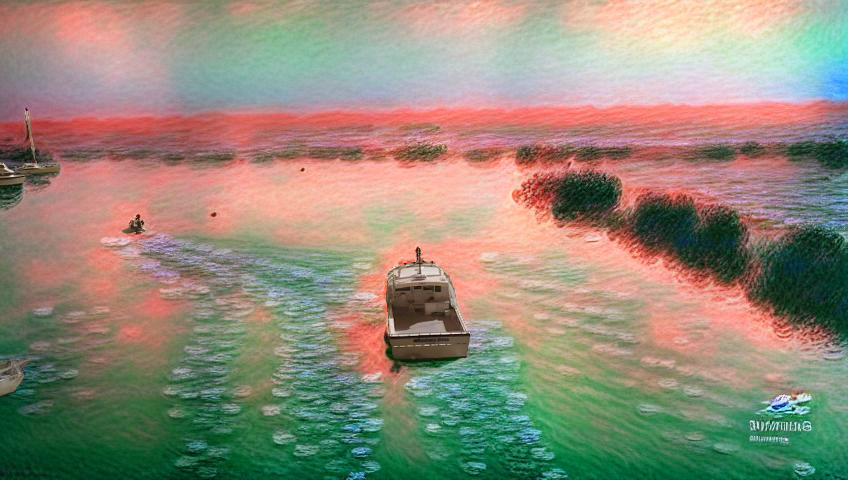

In [ ]:
finalFrames[0]

In [ ]:
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video = cv2.VideoWriter('/content/drive/MyDrive/CSU Long Beach/boat_masked.mp4', fourcc, 10, (848,480), isColor=True)

for finalFrame in finalFrames:
    video.write(finalFrame)

cv2.destroyAllWindows()
video.release()